In [382]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model

import matplotlib.pyplot as plt
import random
import numpy as np

In [383]:
tipos = 4
values = []

for i in range(0, tipos):
    with open("Datos entreno 2 sensores\\tipo_" + str(i) + ".txt", 'r') as f:
        next(f)  # Saltar la primera línea que contiene el encabezado
        for line in f:
            w1, x1, y1, z1, w2, x2, y2, z2, etiqueta = map(float, line.strip().split(','))
            dato = [w1, x1, y1, z1, w2, x2, y2, z2, etiqueta]
            values.append(dato)
print(len(values))

8000


In [384]:
tipos = 4
data_by_type = {}

for i in range(tipos):
    data_by_type[i] = []  # Inicializar una lista vacía para cada tipo

for i in range(tipos):
    with open("Datos entreno 2 sensores\\tipo_" + str(i) + ".txt", 'r') as f:
        next(f)  # Saltar la primera línea que contiene el encabezado
        for line in f:
            w1, x1, y1, z1, w2, x2, y2, z2, etiqueta = map(float, line.strip().split(','))
            dato = [w1, x1, y1, z1, w2, x2, y2, z2, etiqueta]
            data_by_type[i].append(dato)

# Verificar la longitud de cada lista de datos por tipo
for i in range(tipos):
    print(f'Tipo {i}: {len(data_by_type[i])} muestras')


Tipo 0: 2000 muestras
Tipo 1: 2000 muestras
Tipo 2: 2000 muestras
Tipo 3: 2000 muestras


In [209]:
tipos = 4
data_by_type = {}

for i in range(tipos):
    data_by_type[i] = {'sensor1': [], 'sensor2': []}  # Inicializar listas vacías para cada tipo y cada sensor

for i in range(tipos):
    with open("Datos entreno 2 sensores\\tipo_" + str(i) + ".txt", 'r') as f:
        next(f)  # Saltar la primera línea que contiene el encabezado
        for line in f:
            w1, x1, y1, z1, w2, x2, y2, z2, etiqueta = map(float, line.strip().split(','))
            data_sensor1 = [w1, x1, y1, z1]
            data_sensor2 = [w2, x2, y2, z2]
            data_by_type[i]['sensor1'].append(data_sensor1)
            data_by_type[i]['sensor2'].append(data_sensor2)

# Verificar la longitud de cada lista de datos por tipo y sensor
for i in range(tipos):
    print(f'Tipo {i}: {len(data_by_type[i]["sensor1"])} muestras para sensor 1')
    print(f'Tipo {i}: {len(data_by_type[i]["sensor2"])} muestras para sensor 2')

Tipo 0: 2000 muestras para sensor 1
Tipo 0: 2000 muestras para sensor 2
Tipo 1: 2000 muestras para sensor 1
Tipo 1: 2000 muestras para sensor 2
Tipo 2: 2000 muestras para sensor 1
Tipo 2: 2000 muestras para sensor 2
Tipo 3: 2000 muestras para sensor 1
Tipo 3: 2000 muestras para sensor 2


In [201]:
print(data_by_type[0]["sensor1"][:5])
print(data_by_type[0]["sensor2"][:5])

[[0.99993896, -0.00067139, 0.00024414, 0.01147461], [0.99902344, -0.03338623, 0.02642822, 0.01245117], [0.99914551, -0.03137207, 0.02471924, 0.01226807], [0.99914551, -0.03063965, 0.02368164, 0.01251221], [0.99914551, -0.03179932, 0.02142334, 0.01544189]]
[[0.99993896, -0.00067139, 0.00024414, 0.01147461], [0.99902344, -0.03338623, 0.02642822, 0.01245117], [0.99914551, -0.03137207, 0.02471924, 0.01226807], [0.99914551, -0.03063965, 0.02368164, 0.01251221], [0.99914551, -0.03179932, 0.02142334, 0.01544189]]


TypeError: list indices must be integers or slices, not str

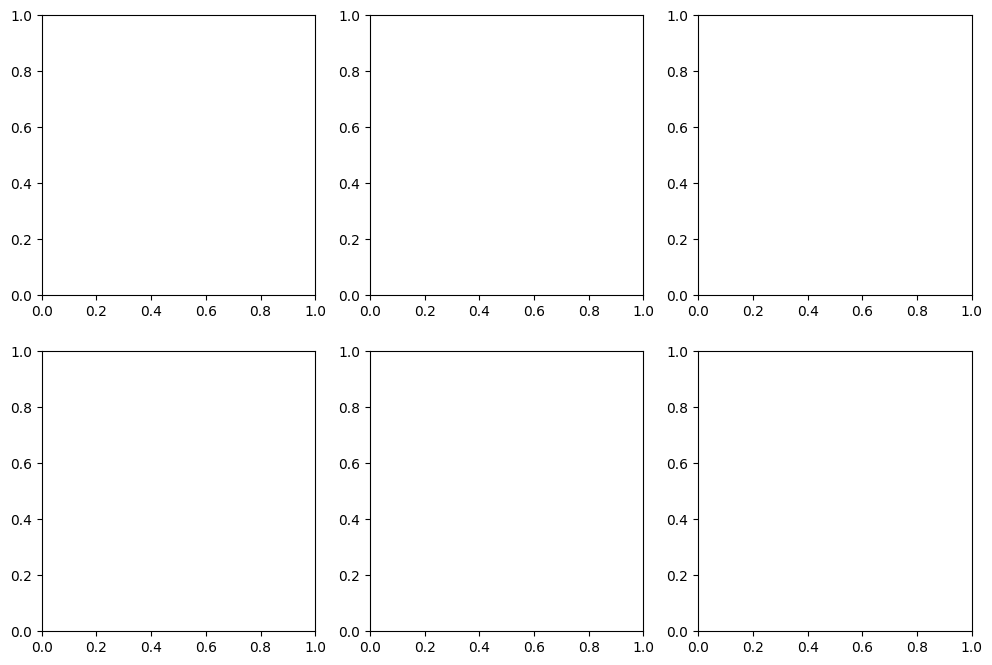

In [206]:
colores = ['r', 'g', 'b', 'y']
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Grafico sensor 1
for i in range(tipos):
    datos_tipo_i = np.array(data_by_type[i]['sensor1'])
    axs[0, 0].scatter(datos_tipo_i[:, 1], datos_tipo_i[:, 2], color=colores[i], label=f'Tipo {i}')

axs[0, 0].set_title('X vs Y'), axs[0, 0].set_xlabel('X'), axs[0, 0].set_ylabel('Y'), axs[0, 0].legend(), axs[0, 0].grid(True)

for i in range(tipos):
    datos_tipo_i = np.array(data_by_type[i]['sensor1'])
    axs[0, 1].scatter(datos_tipo_i[:, 1], datos_tipo_i[:, 3], color=colores[i], label=f'Tipo {i}')

axs[0, 1].set_title('X vs z'), axs[0, 1].set_xlabel('X'), axs[0, 1].set_ylabel('Z'), axs[0, 1].legend(), axs[0, 1].grid(True)

for i in range(tipos):
    datos_tipo_i = np.array(data_by_type[i]['sensor1'])
    axs[0, 2].scatter(datos_tipo_i[:, 2], datos_tipo_i[:, 3], color=colores[i], label=f'Tipo {i}')

axs[0, 2].set_title('Y vs Z'), axs[0, 2].set_xlabel('Y'), axs[0, 2].set_ylabel('Z'), axs[0, 2].legend(), axs[0, 2].grid(True)

# Grafico sensor 2
for i in range(tipos):
    datos_tipo_i = np.array(data_by_type[i]['sensor2'])
    axs[1, 0].scatter(datos_tipo_i[:, 1], datos_tipo_i[:, 2], color=colores[i], label=f'Tipo {i}')

axs[1, 0].set_title('X vs Y'), axs[0, 0].set_xlabel('X'), axs[1, 0].set_ylabel('Y'), axs[1, 0].legend(), axs[1, 0].grid(True)

for i in range(tipos):
    datos_tipo_i = np.array(data_by_type[i]['sensor2'])
    axs[1, 1].scatter(datos_tipo_i[:, 1], datos_tipo_i[:, 3], color=colores[i], label=f'Tipo {i}')

axs[1, 1].set_title('X vs z'), axs[1, 1].set_xlabel('X'), axs[1, 1].set_ylabel('Z'), axs[1, 1].legend(), axs[1, 1].grid(True)

for i in range(tipos):
    datos_tipo_i = np.array(data_by_type[i]['sensor2'])
    axs[1, 2].scatter(datos_tipo_i[:, 2], datos_tipo_i[:, 3], color=colores[i], label=f'Tipo {i}')

axs[1, 2].set_title('Y vs Z'), axs[1, 2].set_xlabel('Y'), axs[1, 2].set_ylabel('Z'), axs[1, 2].legend(), axs[1, 2].grid(True)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

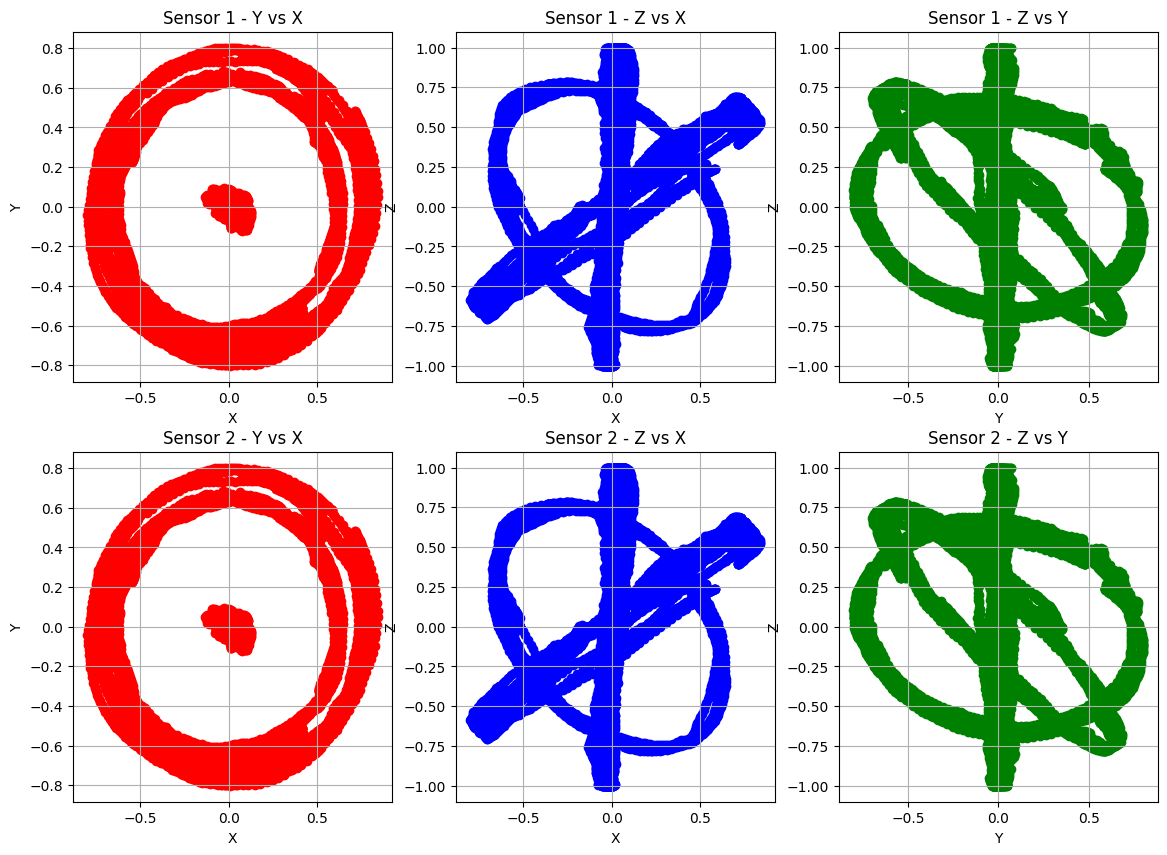

In [385]:
x1, y1, z1, x2, y2, z2 = [], [], [], [], [], []
for v in values:
    x1.append(v[1]), y1.append(v[2]), z1.append(v[3]), x2.append(v[5]), y2.append(v[6]), z2.append(v[7])

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1), plt.scatter(x1, y1, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Sensor 1 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 2), plt.scatter(x1, z1, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Sensor 1 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 3), plt.scatter(y1, z1, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Sensor 1 - Z vs Y'), plt.grid(True)

plt.subplot(2, 3, 4), plt.scatter(x2, y2, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Sensor 2 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 5), plt.scatter(x2, z2, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Sensor 2 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 6), plt.scatter(y2, z2, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Sensor 2 - Z vs Y'), plt.grid(True)
plt.show()

In [386]:
test_size = int(len(values) * 0.2)  # Calcula el tamaño del conjunto de prueba (20%)

# Mezcla aleatoriamente los índices de los datos de entrenamiento
indices = list(range(len(values)))
random.shuffle(indices)

test_indices = indices[:test_size]  # Selecciona los primeros test_size índices para el conjunto de prueba
train_indices = indices[test_size:] # Resto de los índices para el conjunto de entrenamiento

# Construye los conjuntos de entrenamiento y prueba
train, test = [], []
test = [values[i] for i in test_indices]
train = [values[i] for i in train_indices]

train_values, train_labels, test_values, test_labels = [], [], [], []

for valor in train:
    dato, etiqueta = valor[:8], valor[8:]
    train_values.append(dato)
    train_labels.append(etiqueta)

for valor in test:
    dato, etiqueta = valor[:8], valor[8:]
    test_values.append(dato)
    test_labels.append(etiqueta)

In [387]:
# Calcula el tamaño del conjunto de prueba (20%)
test_size_per_type = int(min(len(data_by_type[i]) for i in range(tipos)) * 0.2)

# Mezcla aleatoriamente los índices de los datos de cada tipo
train_indices, test_indices = [], []
for i in range(tipos):
    indices = list(range(len(data_by_type[i])))
    random.shuffle(indices)
    test_indices.extend(indices[:test_size_per_type])
    train_indices.extend(indices[test_size_per_type:])

# Construye los conjuntos de entrenamiento y prueba
# train_values, train_labels, test_values, test_labels = [], [], [], []
# for i in range(tipos):
#     for idx in train_indices:
#         train_values.append(data_by_type[i][idx][:8])  # Solo tomamos los primeros 8 valores
#         train_labels.append(data_by_type[i][idx][8:])  # La etiqueta está en la última posición
#     for idx in test_indices:
#         test_values.append(data_by_type[i][idx][:8])
#         test_labels.append(data_by_type[i][idx][8:])
# Construye los conjuntos de entrenamiento y prueba
train_values, train_labels, test_values, test_labels = [], [], [], []
for idx in train_indices:
    for i in range(tipos):
        train_values.append(data_by_type[i][idx][:8])  # Solo tomamos los primeros 8 valores
        train_labels.append(data_by_type[i][idx][8:])  # La etiqueta está en la última posición

for idx in test_indices:
    for i in range(tipos):
        test_values.append(data_by_type[i][idx][:8])   # Solo tomamos los primeros 8 valores
        test_labels.append(data_by_type[i][idx][8:])   # La etiqueta está en la última posición

# Mezcla aleatoriamente los datos de entrenamiento y prueba
# combined_train = list(zip(train_values, train_labels))
# combined_test = list(zip(test_values, test_labels))
# random.shuffle(combined_train)
# random.shuffle(combined_test)
# train_values[:], train_labels[:] = zip(*combined_train)
# test_values[:], test_labels[:] = zip(*combined_test)


# Mezcla aleatoriamente los índices de los datos de entrenamiento y prueba
random.shuffle(train_indices)
random.shuffle(test_indices)

# Reordena los valores y etiquetas de acuerdo a los índices mezclados
train_values = [train_values[i] for i in train_indices]
train_labels = [train_labels[i] for i in train_indices]
test_values = [test_values[i] for i in test_indices]
test_labels = [test_labels[i] for i in test_indices]

print(len(train_values))
print(len(test_values))

6400
1600


In [388]:
print(train_values[:1])
print(train_labels[:5])
print(train_labels[995:])
print(len(train_values))
print(len(test_values))

[[-0.96765137, -0.00305176, 0.00714111, 0.25219727, -0.96765137, -0.00305176, 0.00714111, 0.25219727]]
[[0.0], [2.0], [3.0], [2.0], [3.0]]
[[0.0], [1.0], [0.0], [2.0], [1.0], [2.0], [2.0], [3.0], [3.0], [0.0], [1.0], [1.0], [3.0], [0.0], [2.0], [1.0], [1.0], [2.0], [2.0], [2.0], [1.0], [1.0], [0.0], [3.0], [3.0], [3.0], [0.0], [3.0], [1.0], [2.0], [3.0], [3.0], [2.0], [0.0], [3.0], [1.0], [3.0], [3.0], [0.0], [1.0], [1.0], [3.0], [3.0], [2.0], [1.0], [2.0], [1.0], [1.0], [0.0], [2.0], [2.0], [0.0], [3.0], [2.0], [3.0], [1.0], [0.0], [3.0], [3.0], [2.0], [1.0], [3.0], [1.0], [0.0], [1.0], [3.0], [2.0], [2.0], [3.0], [3.0], [3.0], [1.0], [0.0], [3.0], [0.0], [0.0], [0.0], [0.0], [1.0], [3.0], [3.0], [2.0], [1.0], [2.0], [3.0], [2.0], [2.0], [0.0], [2.0], [1.0], [0.0], [2.0], [0.0], [0.0], [1.0], [2.0], [2.0], [1.0], [3.0], [0.0], [2.0], [3.0], [3.0], [2.0], [2.0], [1.0], [1.0], [0.0], [1.0], [2.0], [3.0], [2.0], [3.0], [3.0], [3.0], [2.0], [3.0], [0.0], [3.0], [3.0], [0.0], [0.0], [0.0],

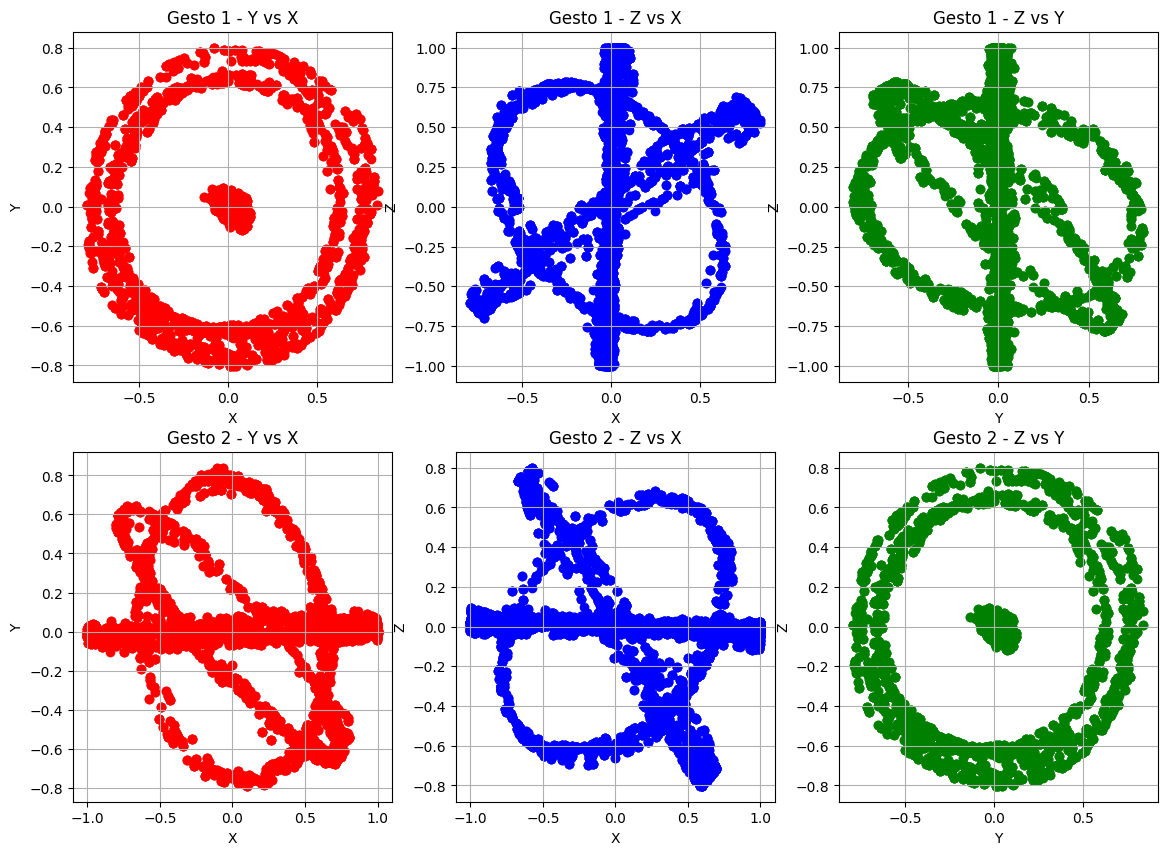

In [389]:
x1, y1, z1, x2, y2, z2 = [], [], [],[], [], []
for v in train_values:
    x1.append(v[1]), y1.append(v[2]), z1.append(v[3]), x2.append(v[4]), y2.append(v[5]), z2.append(v[6])

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1), plt.scatter(x1, y1, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Gesto 1 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 2), plt.scatter(x1, z1, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Gesto 1 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 3), plt.scatter(y1, z1, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Gesto 1 - Z vs Y'), plt.grid(True)

plt.subplot(2, 3, 4), plt.scatter(x2, y2, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Gesto 2 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 5), plt.scatter(x2, z2, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Gesto 2 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 6), plt.scatter(y2, z2, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Gesto 2 - Z vs Y'), plt.grid(True)
plt.show()

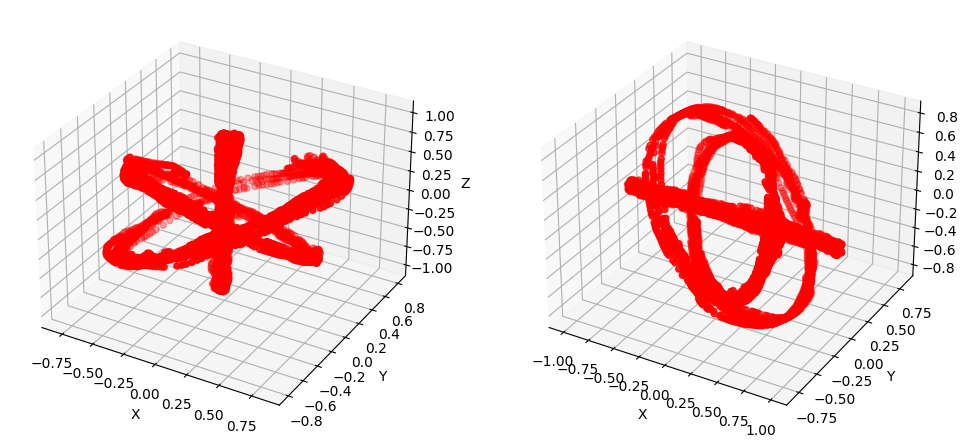

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x2162304a680>,
 Text(-0.04033343783690505, -0.08732445447180061, 'X'),
 Text(0.06811776674000844, -0.07075223053697645, 'Y'),
 Text(0.10436717821226951, 0.013982550559146304, 'Z'),
 None)

In [158]:
x1, y1, z1, x2, y2, z2 = [], [], [],[], [], []
for v in train_values:
    x1.append(v[1]), y1.append(v[2]), z1.append(v[3]), x2.append(v[4]), y2.append(v[5]), z2.append(v[6])

fig = plt.figure(figsize=(12, 8))
a1 = fig.add_subplot(1,2,1, projection='3d')
a1.scatter(x1, y1, z1, c='r', marker='o'), a1.set_xlabel('X'), a1.set_ylabel('Y'), a1.set_zlabel('Z')
a2 = fig.add_subplot(1,2,2, projection='3d')
a2.scatter(x2, y2, z2, c='r', marker='o'), a2.set_xlabel('X'), a2.set_ylabel('Y'), a2.set_zlabel('Z'), plt.show()

In [401]:
labels_one_hot = to_categorical(train_labels)   # Convertimos las etiquetas en one hot

# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(16, input_shape=(8,), activation='sigmoid'),
    Dense(4, activation='softmax')
])

# Compilamos el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['acc'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=50, batch_size=30, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

200/200 [==============================] - 1s 2ms/step - loss: 0.2330 - acc: 0.8789
Loss: 0.2330293208360672, Accuracy: 0.87890625


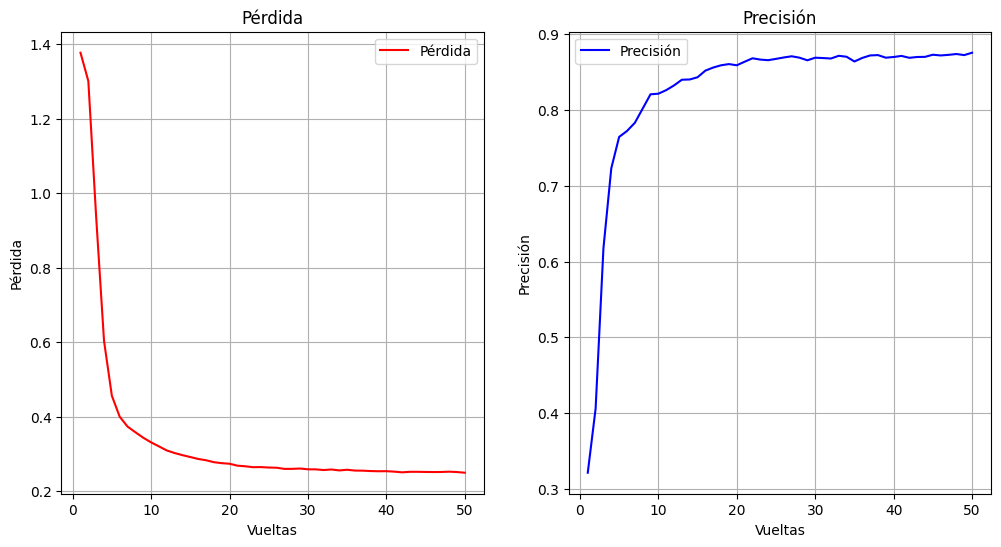

In [400]:
loss, accuracy = history.history['loss'], history.history['acc']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1), plt.plot(epochs, loss, 'r', label='Pérdida')
plt.title('Pérdida'), plt.xlabel('Vueltas'), plt.ylabel('Pérdida'), plt.legend(), plt.grid(True)

plt.subplot(1, 2, 2), plt.plot(epochs, accuracy, 'b', label='Precisión')
plt.title('Precisión'), plt.xlabel('Vueltas'), plt.ylabel('Precisión'), plt.legend(), plt.grid(True)
plt.show()

In [319]:
# Supongamos que tienes tus datos de prueba en test_inputs y tus etiquetas verdaderas en test_labels

predictions = model.predict(test_values)

# Convertir las predicciones a clases (0 o 1)
predicted_classes = tf.argmax(predictions, axis=1)

# Calcular el AUC
auc_metric = tf.keras.metrics.AUC(num_thresholds=100)
auc_metric.update_state(test_labels, predictions[:, 1])

# Obtener el resultado del AUC
auc_result = auc_metric.result().numpy()

# Mostrar el resultado del AUC
print("AUC:", auc_result)

50/50 [==============================] - 0s 1ms/step
AUC: 0.5327333


50/50 [==============================] - 0s 2ms/step
Ejemplos del conjunto de prueba:


In [375]:
# Hacer predicciones en el conjunto de datos de prueba
predictions = model.predict(test_values)

# Convertir las predicciones a clases
predicted_classes1 = [np.argmax(prediction) for prediction in predictions]

# Imprimir algunos ejemplos de valores reales y predichos del conjunto de prueba
# print("Ejemplos del conjunto de prueba:")
# for i in range(50):  # Muestra los primeros 5 ejemplos
#     print(f"Valor Real: {test_labels[i]}, Etiqueta Predicha: {predicted_classes[i]}")


# Convertir las predicciones a clases (0 o 1)
predicted_classes = tf.argmax(predictions, axis=1)

# Calcular el AUC
auc_metric = tf.keras.metrics.AUC(num_thresholds=100)
auc_metric.update_state(test_labels, predictions[:, 1])

# Obtener el resultado del AUC
auc_result = auc_metric.result().numpy()

# Mostrar el resultado del AUC
print("AUC:", auc_result)



from sklearn.metrics import roc_curve, auc

# Supongamos que tienes las etiquetas verdaderas en test_labels y las predicciones del modelo en predictions

# Calcula la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales
# fpr, tpr, thresholds = roc_curve(test_labels, predictions[:, 1])

# # Calcula el área bajo la curva ROC (AUC)
# roc_auc = auc(fpr, tpr)

# # Grafica la curva ROC
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Tasa de Falsos Positivos')
# plt.ylabel('Tasa de Verdaderos Positivos')
# plt.title('Curva ROC')
# plt.legend(loc="lower right")
# plt.show()

50/50 [==============================] - 1s 5ms/step
AUC: 0.67375


In [376]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Supongamos que tienes las etiquetas verdaderas en test_labels y las predicciones del modelo en predicted_labels

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Visualiza la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase {}'.format(i) for i in range(n_classes)], yticklabels=['Clase {}'.format(i) for i in range(n_classes)])
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()


NameError: name 'n_classes' is not defined

<Figure size 800x600 with 0 Axes>

In [324]:
# Supongamos que tienes tus datos de prueba en test_inputs y tus etiquetas verdaderas en test_labels

# Predecir usando tu modelo
predictions = model.predict(test_values)

# Convertir las predicciones a clases (0 o 1)
predicted_classes = tf.argmax(predictions, axis=1)

# Calcular métricas
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(test_labels, predicted_classes)

precision = tf.keras.metrics.Precision()
precision.update_state(test_labels, predicted_classes)

recall = tf.keras.metrics.Recall()
recall.update_state(test_labels, predicted_classes)

# # Calcular la curva ROC y el área bajo la curva (AUC)
# fpr, tpr, thresholds = tf.keras.metrics.AUC(num_thresholds=100).update_state(test_labels, predictions[:, 1])

# Obtener los resultados de las métricas
accuracy_result = accuracy.result().numpy()
precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
# auc_result = tf.keras.metrics.AUC(num_thresholds=100).result().numpy()

# Mostrar métricas
print("Accuracy:", accuracy_result)
print("Precision:", precision_result)
print("Recall:", recall_result)
# print("AUC:", auc_result)

# Convertir las predicciones a clases (0 o 1)
predicted_classes = tf.argmax(predictions, axis=1)

# Calcular el AUC
auc_metric = tf.keras.metrics.AUC(num_thresholds=100)
auc_metric.update_state(test_labels, predictions[:, 1])

# Obtener el resultado del AUC
auc_result = auc_metric.result().numpy()

# Mostrar el resultado del AUC
print("AUC:", auc_result)

50/50 [==============================] - 0s 1ms/step
Accuracy: 0.4175
Precision: 0.7725857
Recall: 0.82666665
AUC: 0.5327333


In [298]:
# Contadores para las predicciones correctas e incorrectas
correct_predictions = 0
incorrect_predictions = 0

# Comparar las etiquetas reales con las etiquetas predichas
for i in range(len(test_labels)):
    if test_labels[i] == predicted_classes[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Imprimir el recuento de predicciones correctas e incorrectas
print(f"Predicciones Correctas: {correct_predictions}")
print(f"Predicciones Incorrectas: {incorrect_predictions}")


total_predictions = len(test_labels)
accuracy = (correct_predictions / total_predictions) * 100
error_rate = (incorrect_predictions / total_predictions) * 100


# Imprimir el porcentaje de aciertos y errores
print(f"Porcentaje de Aciertos: {accuracy:.2f}%")
print(f"Porcentaje de Errores: {error_rate:.2f}%")

Predicciones Correctas: 1396
Predicciones Incorrectas: 204
Porcentaje de Aciertos: 87.25%
Porcentaje de Errores: 12.75%


In [296]:
# Ruta donde se guardará el modelo
ruta_modelo = "modelo_7_precision_98,9487_4_gestos.h5"

# Guardar el modelo
model.save(ruta_modelo)


# Modelo --> modelo_5_precision_87,5625_4_gestos
# model = Sequential([
#     Dense(8, input_shape=(8,), activation='sigmoid'),
#     Dense(4, activation='softmax')
# ])

# # Compilamos el modelo
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
# model.compile(optimizer=optimizer,
#               loss='mean_squared_error',
#               metrics=['precision'])

# # Entrenamos el modelo
# history = model.fit(inputs, labels, epochs=100, batch_size=10, verbose=0)

# Modelo --> modelo_6_precision_88,4999_4_gestos
# model = Sequential([
#     Dense(12, input_shape=(8,), activation='sigmoid'),
#     Dense(4, activation='softmax')
# ])

# # Compilamos el modelo
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
# model.compile(optimizer=optimizer,
#               loss='mean_squared_error',
#               metrics=['accuracy'])

# # Entrenamos el modelo
# history = model.fit(inputs, labels, epochs=100, batch_size=20, verbose=0)


# Modelo --> modelo_7_precision_98,9487_4_gestos
# model = Sequential([
#     Dense(16, input_shape=(8,), activation='sigmoid'),
#     Dense(4, activation='softmax')
# ])

# # Compilamos el modelo
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
# model.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',
#               metrics=['AUC'])

# Entrenamos el modelo
# history = model.fit(inputs, labels, epochs=100, batch_size=20, verbose=0)